# Scoring dan Ranking
(Index Elimination and Champion List)

## Preprocessing

In [6]:
def tokenisasi(text):
    tokens = text.split(" ")
    return tokens

def stemming(text):
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    # create stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    # stemming process
    output = stemmer.stem(text)
    return output

def stemming_sentence(text):
    output = ""
    for token in tokenisasi(text):
        output = output + stemming(token) + " "
    return output[:-1]


## Inisisasi Dokumen

In [7]:
doc_dict_raw = {}
doc_dict_raw['doc1'] = "pengembangan sistem informasi penjadwalan"
doc_dict_raw['doc2'] = "pengembangan model analisis sentimen berita"
doc_dict_raw['doc3'] = "analisis sistem input output"
doc_dict_raw['doc4'] = "pengembangan sistem informasi akademik universitas"
doc_dict_raw['doc5'] = "pengembangan sistem cari berita ekonomi"
doc_dict_raw['doc6'] = "analisis sistem neraca nasional"
doc_dict_raw['doc7'] = "pengembangan sistem informasi layanan statistik"
doc_dict_raw['doc8'] = "pengembangan sistem pencarian skripsi di universitas"
doc_dict_raw['doc9'] = "analisis sentimen publik terhadap pemerintah"
doc_dict_raw['doc10'] = "pengembangan model klasifikasi sentimen berita"


## Proses Stemming Kalimat

In [8]:
doc_dict = {}
for doc_id, doc in doc_dict_raw.items():
    doc_dict[doc_id] = stemming_sentence(doc)
print(doc_dict)

{'doc1': 'kembang sistem informasi jadwal', 'doc2': 'kembang model analisis sentimen berita', 'doc3': 'analisis sistem input output', 'doc4': 'kembang sistem informasi akademik universitas', 'doc5': 'kembang sistem cari berita ekonomi', 'doc6': 'analisis sistem neraca nasional', 'doc7': 'kembang sistem informasi layan statistik', 'doc8': 'kembang sistem cari skripsi di universitas', 'doc9': 'analisis sentimen publik hadap perintah', 'doc10': 'kembang model klasifikasi sentimen berita'}


## Inverted Index

In [25]:
vocab = []
inverted_index = {}
for doc_id, doc in doc_dict.items():
    for token in tokenisasi(doc):
        print(token)
        if token not in vocab : 
            vocab.append(token)
            inverted_index[token] = []
        if token in inverted_index:
            if doc_id not in inverted_index[token]:
                inverted_index[token].append(doc_id)
print("\nThis is Vocab :")
print(vocab)
print("\nThis is inverted Index : ")
for doc_id in inverted_index :
    print(doc_id + " : ")
    print(inverted_index[doc_id])
    print("\n")
print(inverted_index)

kembang
sistem
informasi
jadwal
kembang
model
analisis
sentimen
berita
analisis
sistem
input
output
kembang
sistem
informasi
akademik
universitas
kembang
sistem
cari
berita
ekonomi
analisis
sistem
neraca
nasional
kembang
sistem
informasi
layan
statistik
kembang
sistem
cari
skripsi
di
universitas
analisis
sentimen
publik
hadap
perintah
kembang
model
klasifikasi
sentimen
berita

This is Vocab :
['kembang', 'sistem', 'informasi', 'jadwal', 'model', 'analisis', 'sentimen', 'berita', 'input', 'output', 'akademik', 'universitas', 'cari', 'ekonomi', 'neraca', 'nasional', 'layan', 'statistik', 'skripsi', 'di', 'publik', 'hadap', 'perintah', 'klasifikasi']

This is inverted Index : 
kembang : 
['doc1', 'doc2', 'doc4', 'doc5', 'doc7', 'doc8', 'doc10']


sistem : 
['doc1', 'doc3', 'doc4', 'doc5', 'doc6', 'doc7', 'doc8']


informasi : 
['doc1', 'doc4', 'doc7']


jadwal : 
['doc1']


model : 
['doc2', 'doc10']


analisis : 
['doc2', 'doc3', 'doc6', 'doc9']


sentimen : 
['doc2', 'doc9', 'doc10']




## Exact Top K Document Retrieval

### Menghitung tf.idf

In [10]:
# TF 
def termFrequencyInDoc(vocab, doc_dict):
    tf_docs = {}
    for doc_id  in doc_dict.keys():
        tf_docs[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_docs[doc_id][word] = doc.count(word)
    return (tf_docs)

tf = termFrequencyInDoc(vocab, doc_dict)
print(tf)

{'doc1': {'kembang': 1, 'sistem': 1, 'informasi': 1, 'jadwal': 1, 'model': 0, 'analisis': 0, 'sentimen': 0, 'berita': 0, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 0, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}, 'doc2': {'kembang': 1, 'sistem': 0, 'informasi': 0, 'jadwal': 0, 'model': 1, 'analisis': 1, 'sentimen': 1, 'berita': 1, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 0, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}, 'doc3': {'kembang': 0, 'sistem': 1, 'informasi': 0, 'jadwal': 0, 'model': 0, 'analisis': 1, 'sentimen': 0, 'berita': 0, 'input': 1, 'output': 1, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 0, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah'

In [12]:
# IDF

## WordDocument Count 
def wordDocFre(vocab, doc_dict):
    df = {}
    for word in vocab:
        frq = 0
        for doc in doc_dict.values():
            if word in tokenisasi(doc):
                frq = frq + 1
        df[word] = frq
    return (df)

import numpy as np
def inverseDocFre(vocab, doc_fre, length):
    idf = {}
    for word in vocab:
        idf[word] =  1 + np.log((length +1) /(doc_fre[word]+1))
    return(idf)
idf = inverseDocFre(vocab,wordDocFre(vocab, doc_dict), len(doc_dict))
print(idf)

{'kembang': 1.3184537311185345, 'sistem': 1.3184537311185345, 'informasi': 2.01160091167848, 'jadwal': 2.7047480922384253, 'model': 2.2992829841302607, 'analisis': 1.7884573603642702, 'sentimen': 2.01160091167848, 'berita': 2.01160091167848, 'input': 2.7047480922384253, 'output': 2.7047480922384253, 'akademik': 2.7047480922384253, 'universitas': 2.2992829841302607, 'cari': 2.2992829841302607, 'ekonomi': 2.7047480922384253, 'neraca': 2.7047480922384253, 'nasional': 2.7047480922384253, 'layan': 2.7047480922384253, 'statistik': 2.7047480922384253, 'skripsi': 2.7047480922384253, 'di': 2.7047480922384253, 'publik': 2.7047480922384253, 'hadap': 2.7047480922384253, 'perintah': 2.7047480922384253, 'klasifikasi': 2.7047480922384253}


In [13]:
# TF.IDF
def tfidf(vocab, tf, idf_scr, doc_dict):
    tf_idf_scr = {}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word] * idf_scr[word]
    return (tf_idf_scr)
print(tfidf(vocab, tf, idf, doc_dict))

{'doc1': {'kembang': 1.3184537311185345, 'sistem': 1.3184537311185345, 'informasi': 2.01160091167848, 'jadwal': 2.7047480922384253, 'model': 0.0, 'analisis': 0.0, 'sentimen': 0.0, 'berita': 0.0, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc2': {'kembang': 1.3184537311185345, 'sistem': 0.0, 'informasi': 0.0, 'jadwal': 0.0, 'model': 2.2992829841302607, 'analisis': 1.7884573603642702, 'sentimen': 2.01160091167848, 'berita': 2.01160091167848, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc3': {'kembang': 0.0, 'sistem': 1.3184537311185345, 'informasi': 0.0, 'jadwal': 0.0, 'mod

In [14]:
# Term Freq 
query = "sistem informasi statistik"
# query = "sistem sentimen berita"
def termFrequency(vocab, query):
    tf_query = {}
    for word in vocab:
        tf_query[word] = query.count(word)
    return (tf_query)
tf_query = termFrequency(vocab, query)
print(tf_query)

{'kembang': 0, 'sistem': 1, 'informasi': 1, 'jadwal': 0, 'model': 0, 'analisis': 0, 'sentimen': 0, 'berita': 0, 'input': 0, 'output': 0, 'akademik': 0, 'universitas': 0, 'cari': 0, 'ekonomi': 0, 'neraca': 0, 'nasional': 0, 'layan': 0, 'statistik': 1, 'skripsi': 0, 'di': 0, 'publik': 0, 'hadap': 0, 'perintah': 0, 'klasifikasi': 0}


In [15]:
# Term - Query Matrix
TQ = np.zeros((len(vocab),1))
for word in vocab:
    ind1 = vocab.index(word)
    TQ[ind1][0] = tf_query[word] * idf[word]
print(TQ)

[[0.        ]
 [1.31845373]
 [2.01160091]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [2.70474809]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


In [16]:
import math
def cosine_sim(vec1, vec2):
#     vec1 = list(vec1)  # kenapa ini list object is not callable
#     vec2 = list(vec2) 
    dot_prod = 0
    for i,v in enumerate(vec1):
        dot_prod += v * vec2[i]
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    return(dot_prod/(mag_1*mag_2))

In [17]:
def tfidf(vocab, tf, idf_scr, doc_dict):
    tf_idf_scr = {}
    for doc_id in doc_dict.keys():
        tf_idf_scr[doc_id] = {}
    for word in vocab:
        for doc_id, doc in doc_dict.items():
            tf_idf_scr[doc_id][word] = tf[doc_id][word] * idf_scr[word]
    return (tf_idf_scr)

tf_idf = tfidf(vocab, termFrequencyInDoc(vocab, doc_dict), inverseDocFre(vocab, wordDocFre(vocab, doc_dict), len(doc_dict)), doc_dict)
print(tf_idf)

{'doc1': {'kembang': 1.3184537311185345, 'sistem': 1.3184537311185345, 'informasi': 2.01160091167848, 'jadwal': 2.7047480922384253, 'model': 0.0, 'analisis': 0.0, 'sentimen': 0.0, 'berita': 0.0, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc2': {'kembang': 1.3184537311185345, 'sistem': 0.0, 'informasi': 0.0, 'jadwal': 0.0, 'model': 2.2992829841302607, 'analisis': 1.7884573603642702, 'sentimen': 2.01160091167848, 'berita': 2.01160091167848, 'input': 0.0, 'output': 0.0, 'akademik': 0.0, 'universitas': 0.0, 'cari': 0.0, 'ekonomi': 0.0, 'neraca': 0.0, 'nasional': 0.0, 'layan': 0.0, 'statistik': 0.0, 'skripsi': 0.0, 'di': 0.0, 'publik': 0.0, 'hadap': 0.0, 'perintah': 0.0, 'klasifikasi': 0.0}, 'doc3': {'kembang': 0.0, 'sistem': 1.3184537311185345, 'informasi': 0.0, 'jadwal': 0.0, 'mod

In [18]:
# Term - Document Matrix
TD = np.zeros((len(vocab), len(doc_dict)))
for word in vocab:
    for doc_id, doc in tf_idf.items():
        ind1 = vocab.index(word)
        ind2 = list(tf_idf.keys()).index(doc_id)
        TD[ind1][ind2] = tf_idf[doc_id][word]
print(TD)

[[1.31845373 1.31845373 0.         1.31845373 1.31845373 0.
  1.31845373 1.31845373 0.         1.31845373]
 [1.31845373 0.         1.31845373 1.31845373 1.31845373 1.31845373
  1.31845373 1.31845373 0.         0.        ]
 [2.01160091 0.         0.         2.01160091 0.         0.
  2.01160091 0.         0.         0.        ]
 [2.70474809 0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         2.29928298 0.         0.         0.         0.
  0.         0.         0.         2.29928298]
 [0.         1.78845736 1.78845736 0.         0.         1.78845736
  0.         0.         1.78845736 0.        ]
 [0.         2.01160091 0.         0.         0.         0.
  0.         0.         2.01160091 2.01160091]
 [0.         2.01160091 0.         0.         2.01160091 0.
  0.         0.         0.         2.01160091]
 [0.         0.         2.70474809 0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.      

In [20]:
# Menghitung Kemiripan antara Query dengan 3 dokumen 
print(cosine_sim(TQ[:,0], TD[:, 0])) # query and doc 1
print(cosine_sim(TQ[:,0], TD[:, 1])) # query and doc 2
print(cosine_sim(TQ[:,0], TD[:, 2])) # query and doc 3


0.414904809442661
0.0
0.10856998991379904


In [22]:
# Menyimpan skor kemiripan dalam suatu list 
from collections import OrderedDict
def exact_top_k(doc_dict, TD, q,k):
    relevance_scores = {}
    i = 0 
    for doc_id in doc_dict.keys():
        relevance_scores[doc_id] = cosine_sim(q, TD[:,i])
        i  = i + 1
    
    sorted_value = OrderedDict(sorted(relevance_scores.items(),key = lambda x:x[1], reverse = True))
    top_k = {j : sorted_value[j] for j in list(sorted_value)[:k]}
    return top_k
top_2 = exact_top_k(doc_dict, TD, TQ[:, 0], 2)
print(top_2)

{'doc7': 0.7689768599816609, 'doc1': 0.414904809442661}


In [24]:
top_3 = exact_top_k(doc_dict, TD, TQ[:, 0], 3)
print(top_3)

{'doc7': 0.7689768599816609, 'doc1': 0.414904809442661, 'doc4': 0.35626622628022314}


## Inexact Top K Document Retrieval


### Index Elimination (skip ke pertemuan 7)

In [133]:
# untuk mendapatkan gambaran mengenai kedekatan antar dokumen dan query, mari kita visualisasikan terlebih dahulu dalam suatu scatter plot.
# !pip install sklearn
from sklearn.decomposition import TruncatedSVD

DT = TD.transpose()
print(DT)

model = TruncatedSVD(n_components = 2, random_state = 7).fit(DT)
DT_reduced = model.transform(DT)
QT_reduced = model.transform(TQ.transpose())




[[1.31845373 1.31845373 2.01160091 2.70474809 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.31845373 0.         0.         0.         2.29928298 1.78845736
  2.01160091 2.01160091 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.31845373 0.         0.         0.         1.78845736
  0.         0.         2.70474809 2.70474809 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.31845373 1.31845373 2.01160091 0.         0.         0.
  0.         0.         0.         0.         2.70474809 2.29928298
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0. 

In [134]:
print(QT_reduced)

[[ 1.31383803 -1.13993425]]


In [135]:
print(DT_reduced)

[[ 1.85460696 -1.20521699]
 [ 2.74509546  2.42223983]
 [ 1.28045858  0.40858892]
 [ 2.51437715 -1.97533782]
 [ 2.66975879 -0.52969289]
 [ 1.28045858  0.40858892]
 [ 2.21435547 -1.58772069]
 [ 3.10527994 -2.44816317]
 [ 1.68369517  3.47074251]
 [ 2.69457477  2.29898834]]


In [136]:
# !pip install matplotlib

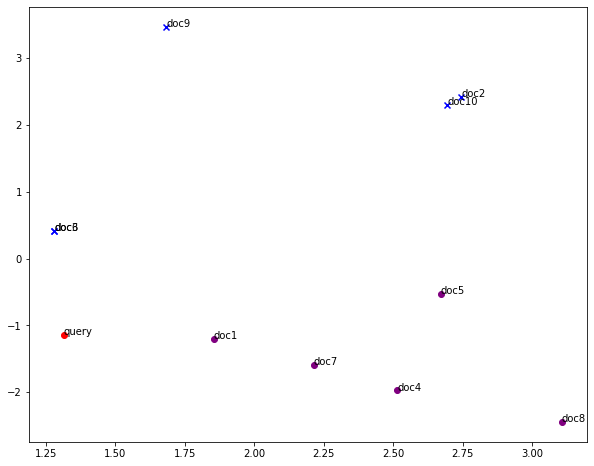

In [137]:

import matplotlib.pyplot as plt 

plt.figure(figsize = (10,8))
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color = ["red"])
doc_ids = list(doc_dict.keys())

for i, txt in enumerate(doc_ids):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i,1]))
    if txt in rel_vecs_id:
        plt.scatter(DT_reduced[i,0], DT_reduced[i,1], marker = "o", color = ['purple'])
    elif txt in nrel_vecs_id:
        plt.scatter(DT_reduced[i,0], DT_reduced[i,1], marker = 'x', color = ["blue"])

plt.annotate("query", (QT_reduced[0,0], QT_reduced[0,1]))
plt.show()

In [93]:
top_5 = exact_top_k(doc_dict, TD, TQ[:, 0], 5)
print(top_5)

{'doc2': 0.6030907532498243, 'doc10': 0.5449479045585194, 'doc5': 0.41125512441743656, 'doc9': 0.23885994806891003, 'doc1': 0.14392034355645508}


In [102]:
rel_vecs_id = ["doc1", "doc4", "doc5", "doc7", "doc8"]
nrel_vecs_id = ["doc2", "doc3", "doc6", "doc9", "doc10"]

rel_vecs = []
for doc in rel_vecs_id:
    rel_vecs.append(DT[doc_ids.index(doc), :])

nrel_vecs = []
for doc in nrel_vecs_id:
    nrel_vecs.append(DT[doc_ids.index(doc), :])

In [138]:
query_vecs = TQ.transpose()
alpha = 1
beta = 0.75
gamma = 0.15

# Update query vectors with Rocchio Algorithm 
query_vecs = alpha * query_vecs + beta * np.mean(rel_vecs, axis = 0) - gamma * np.mean(nrel_vecs, axis = 0)
query_vecs[query_vecs<0] =  0 # negative value => 0
print(query_vecs)

[[0.90973307 2.22818681 2.91682132 0.40571221 0.         0.
  0.         0.18104408 0.         0.         0.40571221 0.6897849
  0.6897849  0.40571221 0.         0.         0.40571221 3.11046031
  0.40571221 0.40571221 0.         0.         0.         0.        ]]


In [139]:
top_5 = exact_top_k(doc_dict, TD, query_vecs[0, :].transpose(), 5)
print(top_5)

{'doc7': 0.8139410370213072, 'doc1': 0.5657921418320059, 'doc4': 0.5552329765446049, 'doc8': 0.34838332440740366, 'doc5': 0.3144070835710513}


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text([3.06479161], [-2.30130977], 'new query')

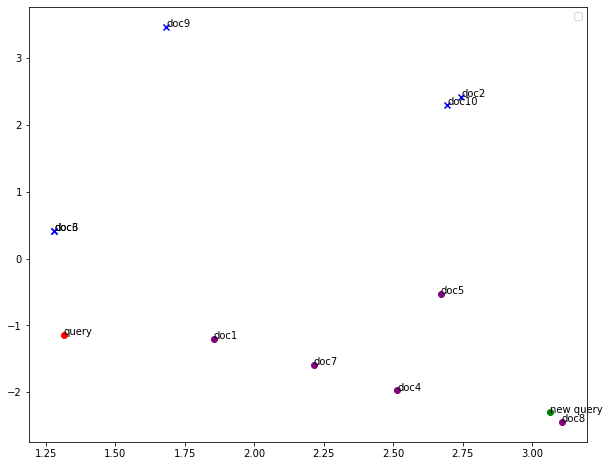

In [140]:
QT1_reduced = model.transform(query_vecs)

plt.figure(figsize = (10,8))
plt.scatter(QT_reduced[:, 0], QT_reduced[:, 1], color = ["red"])
plt.scatter(QT1_reduced[:,  0], QT1_reduced[:, 1], color = ["green"])
doc_ids = list(doc_dict.keys())

for i, txt in enumerate(doc_ids):
    plt.annotate(txt, (DT_reduced[i, 0], DT_reduced[i,1]))
    if txt in rel_vecs_id:
        plt.scatter(DT_reduced[i,0], DT_reduced[i,1], marker = "o", color = ["purple"])
    elif txt in nrel_vecs_id:
        plt.scatter(DT_reduced[i,0], DT_reduced[i,1], marker = "x", color = ["blue"])
plt.legend()
plt.annotate("query", (QT_reduced[0,0], QT_reduced[0,1]))
plt.annotate("new query", (QT1_reduced[:,0], QT1_reduced[:,1]))

# Query Expansion dengan Thesaurus

In [142]:
# !pip install nltk

     ---------------------------------------- 1.5/1.5 MB 298.4 kB/s eta 0:00:00
     ------------------------------------ 267.7/267.7 kB 587.8 kB/s eta 0:00:00


In [144]:
import nltk 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yanto\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\yanto\AppData\Roaming\nltk_data...


True

In [148]:
from itertools import chain
from nltk.corpus import wordnet
query = "information system"

expand_list = []
for term in query.split(" "):
    synonyms = wordnet.synsets(term)
    lemmas = set(chain.from_iterable([word.lemma_names() for word in synonyms]))
    print(lemmas)
    expand_list = expand_list + list(lemmas)
print(expand_list)

query_expand = query + " " + (" ". join(expand_list)).replace("_", " ")
print(query_expand)

{'info', 'selective_information', 'data', 'entropy', 'information'}
{'arrangement', 'organisation', 'system_of_rules', 'system', 'organization', 'scheme'}
['info', 'selective_information', 'data', 'entropy', 'information', 'arrangement', 'organisation', 'system_of_rules', 'system', 'organization', 'scheme']
information system info selective information data entropy information arrangement organisation system of rules system organization scheme
